<a href="https://colab.research.google.com/github/YolandaZhao10/CSCI-6170-Project-in-AI-and-ML/blob/main/hw1/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Advanced Objective Function and Use Case

# Task 1.1

## Model Assumption
Given a binary classification dataset
$\mathscr D =\{(x_i,y_i)\}_{i=1}^N,\quad
x_i\in\mathbb R^d,\; y_i\in\{0,1\}$,
logistic regression models the conditional probability as
$$
p(y_i=1\mid x_i;w)=\sigma(w^\top x_i),
\quad
\sigma(z)=\frac{1}{1+e^{-z}}.
$$

Base on probability for $y_i = 1$, we can also get conditional probability for $y_i = 0$.

$$
p(y_i=0\mid x_i;w)=1-\sigma(w^\top x_i).
$$



## Maximum Likelihood Estimation
Each label $y_i$ is assumed to follow a Bernoulli distribution. The conditional likelihood can be written compactly as

$$
p(y_i\mid x_i;w)
=\sigma(w^\top x_i)^{y_i}
\left(1-\sigma(w^\top x_i)\right)^{1-y_i}.
$$

Assuming the samples are i.i.d., the likelihood over the entire dataset is

$$
\mathscr{L}(w)
=\prod_{i=1}^N p(y_i\mid x_i;w)
=\prod_{i=1}^N
\sigma(w^\top x_i)^{y_i}
\left(1-\sigma(w^\top x_i)\right)^{1-y_i}.
$$

Then, we can taking the logarithm of the likelihood yields the log-likelihood:

$$
\ell(w)
=\log \mathscr{L}(w)
=\sum_{i=1}^N
\Big[
y_i \log \sigma(w^\top x_i)
+(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\Big].
$$

Maximum Likelihood Estimation seeks the parameter $w$ that maximizes the log-likelihood:

$$
w_{\text{MLE}}=\arg\max_w \ell(w).
$$


## Get Objective Function of Logistic Regression Under MLE
Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood. Therefore, the objective function of logistic regression under MLE is

$$
J_{\text{MLE}}(w)
=-\ell(w)
=\sum_{i=1}^N
\Big[
- y_i \log \sigma(w^\top x_i)
-(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\Big].
$$

This objective function is known as the **logistic loss** or **binary cross-entropy loss**.

## MLE vs. MAP for Logistic Regression


**Definition**: Given a dataset$
\mathscr{D}=\{(x_i,y_i)\}_{i=1}^N \quad y_i\in\{0,1\},
$ Logistic Regression models $
p(y_i=1\mid x_i;w)=\sigma(w^\top x_i),\quad
\sigma(z)=\frac{1}{1+e^{-z}}$.

### Objective
- **MLE:** maximize likelihood $p(\mathscr{D}\mid w)$  
- **MAP:** maximize posterior $p(w\mid\mathscr{D}) \propto p(\mathscr{D}\mid w)p(w)$ -> MAP can be interpreted as **MLE + regularization**.

### Regularization
- **MLE:** no explicit regularization term  
- **MAP:** adds prior-based regularization ($-\log p(w)$)

### When it helps
- **MLE:** works well with large datasets  
- **MAP:** often better for small datasets / high-dimensional features because priors reduce overfitting


### Reference
[1] S. Aswani, “IEOR 165 – Lecture 8: Regularization (Maximum A Posteriori Estimation),” University of California, Berkeley. [Online]. Available: https://aswani.ieor.berkeley.edu/teaching/SP16/165/lecture_notes/ieor165_lec8.pdf


[2] A. Ng, “CS229 Lecture Notes: Logistic Regression,” Stanford University. [Online]. Available: https://cs229.stanford.edu/notes2020spring/cs229-notes1.pdf

[3] X. Fern, “Logistic Regression,” Oregon State University, CS534 Lecture Notes. [Online]. Available: https://web.engr.oregonstate.edu/~xfern/classes/cs534-18/Logistic-Regression-3-updated.pdf


# Task 1.2

## Define a machine learning problem you wish to solve using Logistic Regression.
As someone interested in healthcare prediction tasks, I chose to work with heart disease risk prediction, a domain where classification models can provide practical value for early screening and preventive medicine. In this project, we use the **Framingham Heart Study dataset**, which contains historical patient health records collected from a large-scale cardiovascular study. Each record includes medical and lifestyle measurements such as age, blood pressure, cholesterol level, BMI, smoking status, glucose level, and diabetes-related indicators.

The goal of this project is to solve a **binary classification** problem: predicting whether an individual will develop **coronary heart disease within the next 10 years** (`TenYearCHD = 1/0`) based on the health conditions measured at the current time. To address this, we apply **logistic regression**, which is a suitable model because the prediction target is binary and logistic regression naturally outputs a probability value $P(y=1\mid x)$ through a sigmoid activation function applied to a linear combination of the input features. This probability can then be compared against a threshold to determine the predicted class. In addition to being computationally efficient, logistic regression also provides interpretable feature coefficients, allowing us to understand which health factors are most strongly associated with long-term heart disease risk.


**Goal**: Predict whether a patient will develop coronary heart disease within the next 10 years using historical health measurements.

**Dataset (X, y)**: Using the Framingham dataset (loaded locally as `framingham.csv`).

**Target variable (y)**: The dataset provides a binary label: `TenYearCHD ∈ {1, 0}` We define:  
$$
y_i =
\begin{cases}
1, & \text{if TenYearCHD = 1}\\
0, & \text{if TenYearCHD = 0}
\end{cases}
$$
So: $y = \texttt{TenYearCHD}$


**Number of features**: The raw dataset contains 15 predictor features in total. Below are the features used to form $x_i$, each describing a medical, demographic, or lifestyle factor that may influence long-term heart disease risk:

For each observation $i$, we define the feature vector $x_i$ using patient-related medical and lifestyle measurements from the same record.

A typical choice of $X$ is:  
$$
x_i = [\text{male},\text{age},\text{education},\text{currentSmoker},\text{cigsPerDay},
\text{BPMeds},\text{prevalentStroke},\text{prevalentHyp},\text{diabetes},
\text{totChol},\text{sysBP},\text{diaBP},\text{BMI},\text{heartRate},\text{glucose}]
$$

- **`male`**: Binary indicator of biological sex (1 = male, 0 = female). Sex is an important cardiovascular risk factor.
- **`age`**: Age of the patient (in years). Risk of coronary heart disease generally increases as age increases.
- **`education`**: Education level (categorical encoded as integer levels). It can serve as a proxy for socioeconomic status and related health behaviors.
- **`currentSmoker`**: Binary indicator of whether the person currently smokes (1 = yes, 0 = no). Smoking is strongly associated with cardiovascular disease.
- **`cigsPerDay`**: Average number of cigarettes smoked per day. This reflects smoking intensity and contributes to risk severity.

- **`BPMeds`**: Binary indicator of whether the patient is taking blood pressure medication. This suggests a prior blood pressure condition and treatment history.
- **`prevalentStroke`**: Binary indicator of whether the patient has had a stroke previously. Past stroke history signals higher cardiovascular vulnerability.
- **`prevalentHyp`**: Binary indicator of whether the patient has hypertension (high blood pressure). Hypertension is one of the strongest contributors to CHD.
- **`diabetes`**: Binary indicator of whether the patient has diabetes. Diabetes is highly correlated with heart disease due to metabolic and vascular impacts.

- **`totChol`**: Total cholesterol level in the blood. Higher cholesterol is linked to plaque buildup and cardiovascular blockage risk.
- **`sysBP`**: Systolic blood pressure measurement (upper pressure). Elevated systolic BP indicates increased stress on arteries and the heart.
- **`diaBP`**: Diastolic blood pressure measurement (lower pressure). High diastolic BP also reflects long-term cardiovascular strain.
- **`BMI`**: Body Mass Index. High BMI may indicate overweight/obesity, which is associated with higher cardiovascular risk.
- **`heartRate`**: Resting heart rate. Abnormally high resting heart rate can be a signal of cardiovascular stress or reduced fitness.
- **`glucose`**: Blood glucose level. Higher glucose indicates impaired metabolism, and is linked to diabetes and cardiovascular complications.


## Why Logistic Regression is the Best Choice

1. `TenYearCHD` is a two-class label (0/1), which directly matches Logistic Regression.

2. Second, Interpretable coefficients Logistic Regression provides interpretable weights: positive coefficient → increases heart disease probability  
& negative coefficient → decreases heart disease probability. This is valuable for healthcare-related decision support (e.g., understanding which risk factors matter most).

3. This dataset contains thousands of records. Logistic Regression trains quickly, handles moderate-to-large datasets well, and supports regularization (L1/L2) to reduce overfitting.

4. Instead of only predicting a class label, Logistic Regression outputs:  
$$
P(\text{TenYearCHD}=1\mid x)
$$
which is useful for risk-based decisions (e.g., predicting heart disease with confidence thresholds).


## Comparison to Another Linear Classification Model (Linear SVM)
### Objective functions
- **Logistic Regression**: $\min_{w,b} \sum_{i=1}^N \log\bigl(1+\exp(-y_i(w^\top x_i+b))\bigr)$
- **Linear SVM**: $\min_{w,b} \sum_{i=1}^N \max(0, 1 - y_i(w^\top x_i + b))$

### Output
- **Logistic Regression**: Probability $P(y=1\mid x)$
- **Linear SVM**: Class score (not probability)

### Loss
- **Logistic Regression**: Log loss
- **Linear SVM**: Hinge loss

### Interpretability
- **Logistic Regression**: High
- **Linear SVM**: Medium

### Best for
- **Logistic Regression**: Probabilistic risk estimation
- **Linear SVM**: Maximum-margin separation

## Why Logistic Regression is preferred here
In healthcare prediction, **probability outputs** are often necessary (e.g., “this patient has 70% risk of developing CHD in 10 years”), so Logistic Regression is more suitable than SVM unless extra probability calibration is added.

## Reference
[1] X. Fern, “Logistic Regression,” Oregon State University, CS534 Lecture Notes. [Online]. Available: https://web.engr.oregonstate.edu/~xfern/classes/cs534-18/Logistic-Regression-3-updated.pdf

[2] Cornell University, “CS4780 Lecture Note 06: Logistic Regression,” Dept. of Computer Science. [Online]. Available: https://www.cs.cornell.edu/courses/cs4780/2023fa/lectures/lecturenote06.html

[3] A. Ng, “CS229 Lecture Notes: Support Vector Machines,” Stanford University. [Online]. Available: https://cs229.stanford.edu/notes2020spring/cs229-notes2.pdf

[4] D. Klein, “CS 180 Lecture Notes: Support Vector Machines,” University of California, Berkeley. [Online]. Available: https://people.eecs.berkeley.edu/~klein/cs180f13/lectures/lec14.pdf

[5] M. Collins, “Lecture Notes: Support Vector Machines,” Carnegie Mellon University. [Online]. Available: http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf


# Task 1.3

## Mapping dataset variables to equation variables

In the logistic regression formulation shown in the derivation, the binary classification dataset is written as: $$\mathscr{D} = \{(x_i, y_i)\}_{i=1}^{N}, \quad x_i \in \mathbb{R}^d,\quad y_i \in \{0,1\}.$$

In this dataset:

- **$N$** = number of valid patient records used for training (after filtering missing labels, handling missing values, etc.)
- **$x_i$** = feature vector derived from the $i$-th row of `framingham.csv`. After preprocessing (e.g., imputing missing values), each example becomes a vector: $x_i \in \mathbb{R}^d$ where $d$ is the total number of selected medical/lifestyle predictors.
- **$y_i$** = label derived from the $i$-th row, specifically the column `TenYearCHD ∈ {1, 0}`  
  $$
  y_i =
  \begin{cases}
  1, & \text{if TenYearCHD = 1}\\
  0, & \text{if TenYearCHD = 0}
  \end{cases}
  $$
  Thus, $y_i\in\{0,1\}$ matches the Bernoulli assumption used in the MLE derivation.


## Connection to Logistic Regression Probability Model

The derivation assumes logistic regression models: $p(y_i=1 \mid x_i; w) = \sigma(w^\top x_i), \quad \sigma(z)=\frac{1}{1+e^{-z}}$.

In this dataset, this corresponds to: $p(\text{TenYearCHD=1} \mid \text{patient health indicators})$

meaning logistic regression outputs the probability that the patient will develop coronary heart disease within the next 10 years based on current clinical and lifestyle features.

The conditional probability for the negative class is: $p(y_i=0 \mid x_i;w) = 1-\sigma(w^\top x_i)$, which corresponds to the probability of `TenYearCHD = 0`.


## Assumptions in part 1.1 - We will also check EDA and VIF in part 2.2

### Assumption 1: Binary labels follow a Bernoulli distribution
The derivation states each $y_i$ is Bernoulli:
$y_i \sim \text{Bernoulli}(p_i),\quad p_i=\sigma(w^\top x_i)$.

In our dataset, it means that we assume `TenYearCHD` is a binary label that follows a Bernoulli distribution.

### Assumption 2: Conditional independence of labels given features
Logistic regression assumes that once we condition on $x_i$, the label $y_i$ depends only on $x_i$ and parameters $w$, not on other training examples. This supports writing the likelihood as a product: $\mathscr{L}(w)=\prod_{i=1}^{N}p(y_i\mid x_i; w)$.

In our dataset, it means that we assume for each patient record, `TenYearCHD` depends only on that patient’s feature vector (e.g., age, smoking status, blood pressure, cholesterol, BMI, glucose, etc.) and the model parameters $w$, rather than being influenced directly by other patient samples.

### Assumption 3: i.i.d. samples
The derivation explicitly assumes samples are i.i.d.: $\{(x_i,y_i)\}_{i=1}^N \text{ are i.i.d.}$. We treat each row as an independent sample after feature extraction.

In our dataset, it means that we assume each row represents one independent patient example $(x_i,y_i)$, and that the dataset is representative of the overall population distribution of cardiovascular risk factors and long-term CHD outcomes.

### Assumption 4: Linear decision boundary in feature space
Logistic regression uses a linear score $w^\top x_i$, which implies a linear boundary: $w^\top x + b = 0$. Thus, we assume that a linear combination of medical and lifestyle features is sufficient to separate high-risk vs. low-risk heart disease outcomes reasonably well.

In our dataset, it means that the probability of `TenYearCHD` can be reasonably approximated using a linear combination of patient risk factors, so a linear decision boundary in the processed feature space is appropriate.

### Assumption 5: Correct preprocessing makes $x_i\in\mathbb{R}^d$
The mathematical form requires all features to be numeric.
1. categorical/binary features (e.g., `male`, `currentSmoker`, `diabetes`) are already represented as 0/1 indicators
2. missing values are either removed or imputed
3. continuous variables (e.g., blood pressure, cholesterol, BMI, glucose) are kept numeric and optionally standardized
4. all selected features are aligned into a consistent numeric feature vector

In our dataset, it means that all heart-disease-related predictor columns are converted into a numeric feature vector $x_i\in\mathbb{R}^d$ (including handled missing values), so that the logistic regression model $w^\top x_i$ is well-defined.


# Task 2: Dataset and Advanced EDA

# Task 2.1
**Dataset (X, y)**: Using the Framingham Heart Study dataset (loaded locally as `framingham.csv`).

Link to dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

**Number of features**: The raw dataset contains 15 predictor features in total.

In [3]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

In [4]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/framingham.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully from Google Drive with {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.head())
print(df.info())

Mounted at /content/drive
Dataset loaded successfully from Google Drive with 4238 rows and 16 columns.
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0  

# Task 2.2 & Task 2.3

## Perform Exploratory Data Analysis (EDA)

In [5]:
target = 'TenYearCHD'
df = pd.read_csv(file_path)
print("Shape of the dataset:", df.shape)
df = df.dropna(subset=[target])
print("Shape of the dataset(dropNA):", df.shape)
y = df[target].astype(int)
X = df.drop(columns=[target])

print("\nX shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True))


print("\nNumber of NA in each feature:")
print(df.isna().sum())

print("Statistics of the dataset (numeric columns, we did not have categorical columns)")
print(df.describe())


print("Dataset is imbalanced", df.TenYearCHD.value_counts(normalize=True)) #normalizes the result


Shape of the dataset: (4238, 16)
Shape of the dataset(dropNA): (4238, 16)

X shape: (4238, 15)
y distribution:
 TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64

Number of NA in each feature:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Statistics of the dataset (numeric columns, we did not have categorical columns)
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000 

### Pairplot

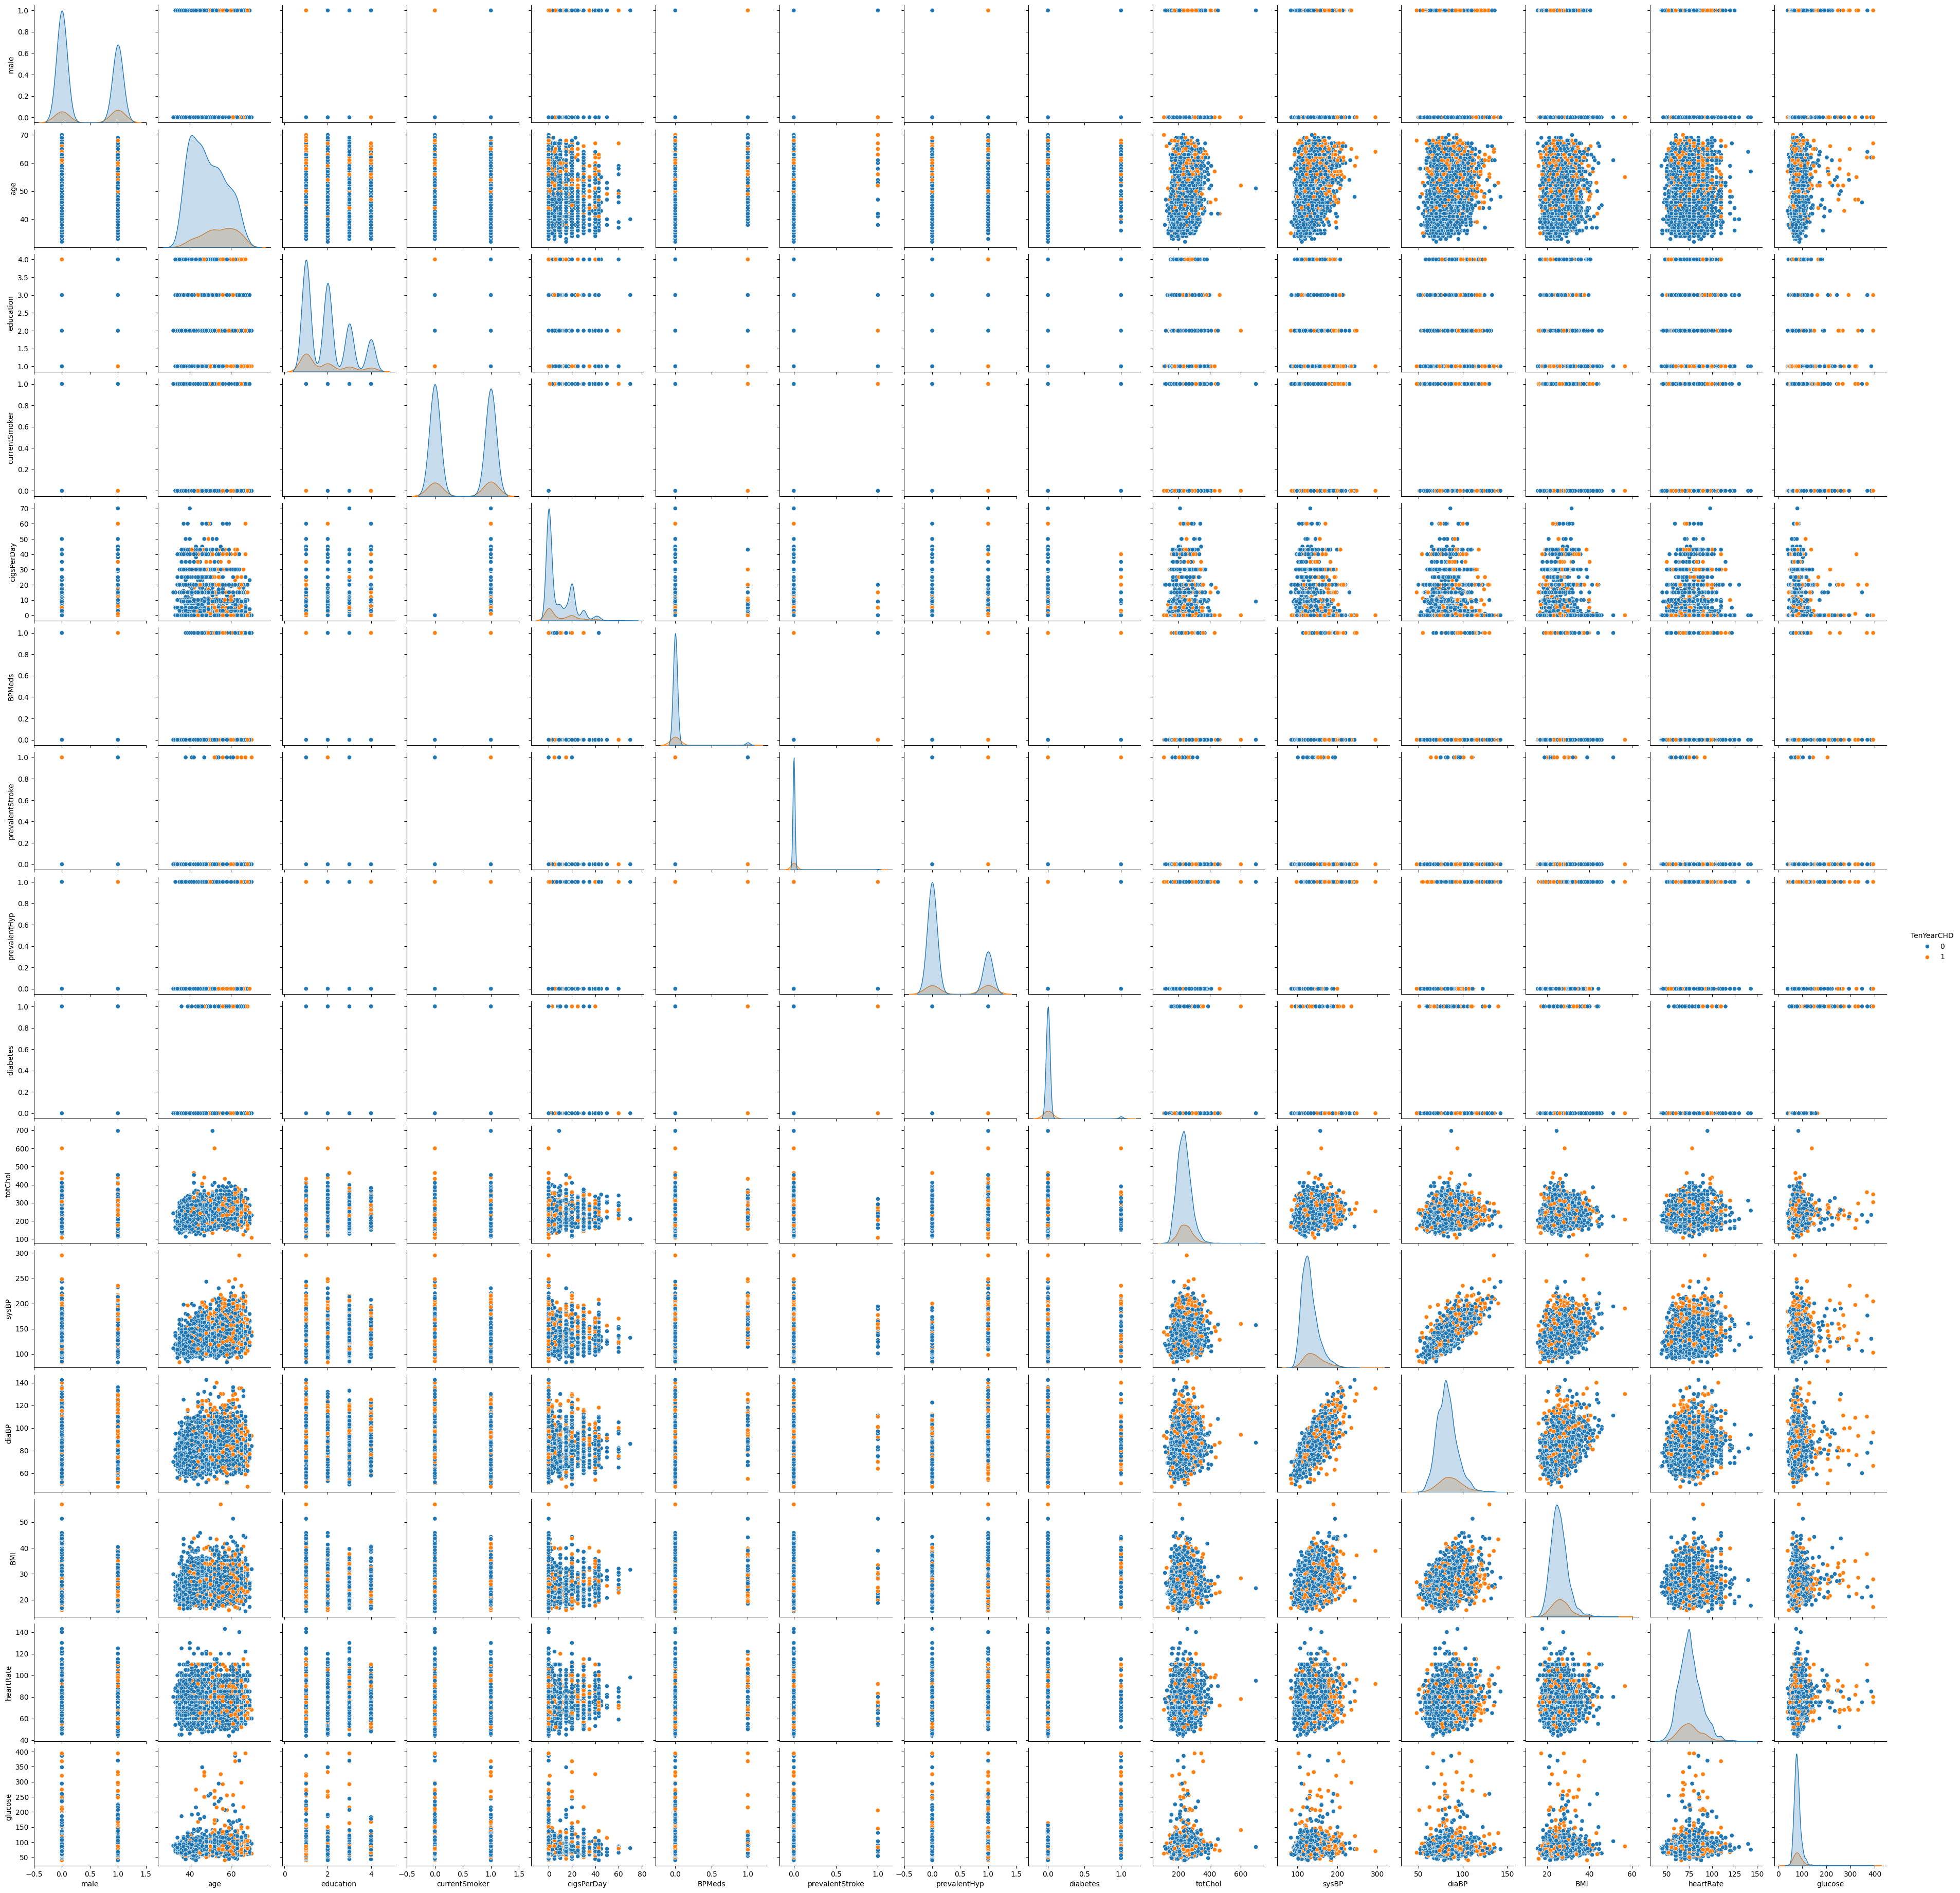

In [4]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue=target)

### Missing Value Imputation

In [6]:
print("which columns have a missing value? \n", df.isnull().any(axis=0))
print("\nhow many rows have a missing value?\n", df.isnull().any(axis=1).sum())
print("\n% of the missing rows?\n", df.isnull().any(axis=1).sum()/df.shape[0]*100)

df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index
print("\nwhat percent of each column is missing?\n",pd.DataFrame({ '% NaN': df_nan}, index=index).T)

which columns have a missing value? 
 male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

how many rows have a missing value?
 582

% of the missing rows?
 13.732892873997168

what percent of each column is missing?
        male  age  education  currentSmoker  cigsPerDay  BPMeds  \
% NaN   0.0  0.0       2.48            0.0        0.68    1.25   

       prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
% NaN              0.0           0.0       0.0     1.18    0.0    0.0  0.45   

       heartRate  glucose  TenYearCHD  
% NaN       0.02     9.16         0.0  


Several features contain missing values in the dataset. The columns with missing data are `education`, `cigsPerDay`, `BPMeds`, `totChol`, `BMI`, `heartRate`, and `glucose`, while the remaining variables (including the label `TenYearCHD`) have no missing values. In total, **582 rows** contain at least one missing value, representing approximately **13.73%** of the dataset. Among all features, **`glucose` has the highest missing rate (9.16%)**, followed by `education` (2.48%), `BPMeds` (1.25%), and `totChol` (1.18%), while the other missing rates are below 1%. Since `glucose` has the highest missing rate (9.16%) and is strongly related to diabetes status and age, we imputed missing glucose values using group-based imputation: replacing missing entries with the median glucose value within each subgroup (e.g., grouped by `diabetes`, optionally further stratified by age bins). This preserves important population structure compared to global mean/median imputation.

In [7]:

# glucose
df["age_bin"] = pd.qcut(df["age"], q=5, duplicates="drop")
df["glucose"] = df["glucose"].fillna(
    df.groupby(["diabetes", "age_bin"])["glucose"].transform("median")
)

df["glucose"] = df["glucose"].fillna(df.groupby("diabetes")["glucose"].transform("median"))
df["glucose"] = df["glucose"].fillna(df["glucose"].median())

df.drop(columns=["age_bin"], inplace=True)

df = df.apply(lambda col: col.fillna(col.median()))

df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index
print("There are no missing values anymore!\n",pd.DataFrame({ '% NaN': df_nan}, index=index).T)

There are no missing values anymore!
        male  age  education  currentSmoker  cigsPerDay  BPMeds  \
% NaN   0.0  0.0        0.0            0.0         0.0     0.0   

       prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  \
% NaN              0.0           0.0       0.0      0.0    0.0    0.0  0.0   

       heartRate  glucose  TenYearCHD  
% NaN        0.0      0.0         0.0  


### Features Correlation

<Axes: >

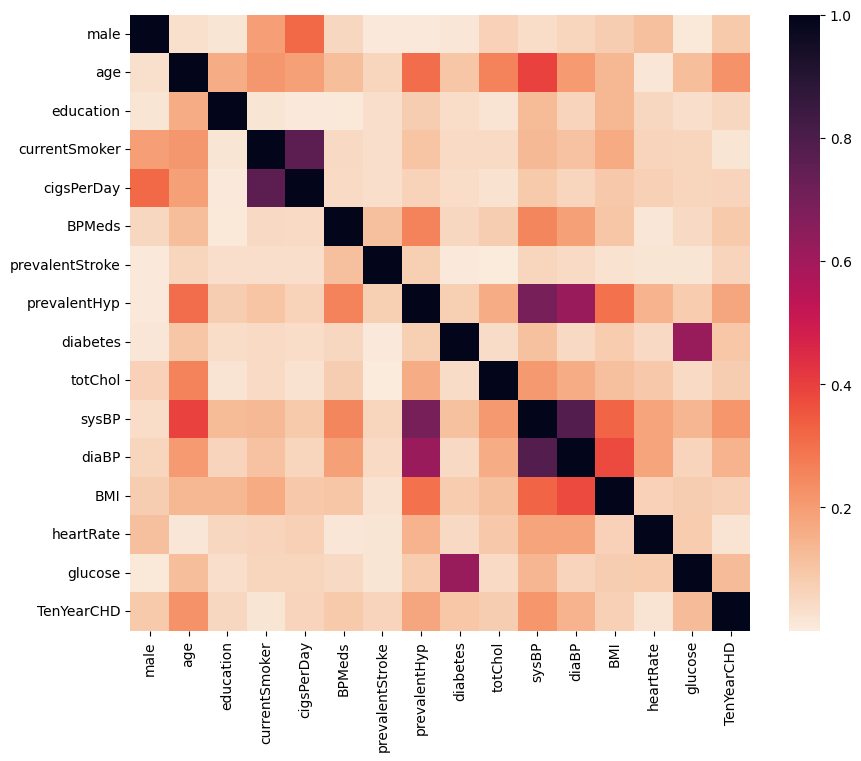

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [15]:
print("feature correlation with target variable\n", df.corr()[target].sort_values(ascending=False))

feature correlation with target variable
 TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.124061
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.081566
BMI                0.074217
prevalentStroke    0.061810
cigsPerDay         0.058859
heartRate          0.022857
currentSmoker      0.019456
education         -0.053383
Name: TenYearCHD, dtype: float64


### Calculate VIF table (before handling)

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=[target])
X_const = sm.add_constant(X)

vif_df = pd.DataFrame()
vif_df["feature"] = X_const.columns[1:]
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i)
                 for i in range(1, X_const.shape[1])]

vif_df = vif_df.sort_values("VIF", ascending=False)
print("VIF table (before handling):")
print(vif_df)


VIF table (before handling):
            feature       VIF
10            sysBP  3.741259
11            diaBP  2.965944
4        cigsPerDay  2.574209
3     currentSmoker  2.454125
7      prevalentHyp  2.053292
14          glucose  1.652217
8          diabetes  1.628227
1               age  1.372515
12              BMI  1.235437
0              male  1.193467
9           totChol  1.106972
5            BPMeds  1.100943
13        heartRate  1.095102
2         education  1.054664
6   prevalentStroke  1.019158


### Iterative removal

In [17]:
def iterative_vif_removal(X_df, thresh=10.0):
    X_cur = X_df.copy()
    removed = []

    while True:
        X_const = sm.add_constant(X_cur)

        vif = pd.DataFrame()
        vif["feature"] = X_const.columns[1:]
        vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                      for i in range(1, X_const.shape[1])]

        vif = vif.sort_values("VIF", ascending=False)
        max_vif = vif["VIF"].max()

        if max_vif < thresh:
            break

        worst_feature = vif.iloc[0]["feature"]
        removed.append((worst_feature, max_vif))
        X_cur = X_cur.drop(columns=[worst_feature])

        print(f"Removed {worst_feature}, VIF={max_vif:.2f}")

    removed_log = pd.DataFrame(removed, columns=["removed_feature", "VIF_at_removal"])
    return X_cur, removed_log

X_original = df.drop(columns=[target])
X_vif_final, removed_log = iterative_vif_removal(X_original, thresh=10.0)

print("\nRemoved features log:")
print(removed_log)
print("\nFinal feature count:", X_vif_final.shape[1])



Removed features log:
Empty DataFrame
Columns: [removed_feature, VIF_at_removal]
Index: []

Final feature count: 15


### VIF table (after handling)

In [18]:
X_const = sm.add_constant(X_vif_final)

vif_after = pd.DataFrame()
vif_after["feature"] = X_const.columns[1:]
vif_after["VIF"] = [variance_inflation_factor(X_const.values, i)
                    for i in range(1, X_const.shape[1])]

vif_after = vif_after.sort_values("VIF", ascending=False)

print("\nVIF table (after handling):")
print(vif_after)



VIF table (after handling):
            feature       VIF
10            sysBP  3.741259
11            diaBP  2.965944
4        cigsPerDay  2.574209
3     currentSmoker  2.454125
7      prevalentHyp  2.053292
14          glucose  1.652217
8          diabetes  1.628227
1               age  1.372515
12              BMI  1.235437
0              male  1.193467
9           totChol  1.106972
5            BPMeds  1.100943
13        heartRate  1.095102
2         education  1.054664
6   prevalentStroke  1.019158


### Multicollinearity Analysis (VIF)

To address potential multicollinearity among features, we computed the Variance Inflation Factor (VIF) for all predictors. The VIF values indicate no severe multicollinearity in this dataset: the maximum VIF is **3.74** (`sysBP`), and all other features have VIF values below **3**. Since all predictors are well below the common threshold (VIF ≥ 10), no variables were removed during the iterative VIF elimination procedure, and the VIF table remained unchanged before and after handling.


# Task 2.3

### Clustermap (Heatmap with clustering)
The clustered correlation heatmap visualizes the absolute correlations among numerical features and groups highly related variables using hierarchical clustering (dendrogram). Overall, most features show weak-to-moderate correlations, indicating limited redundancy. Two clear correlation clusters appear: (1) `currentSmoker` and `cigsPerDay` are strongly correlated, reflecting that smokers tend to report higher cigarettes-per-day values; (2) blood-pressure-related features (`sysBP`, `diaBP`, and `prevalentHyp`) form another strong cluster, showing these variables capture similar cardiovascular information. In addition, `glucose` is noticeably correlated with `diabetes`, which is medically consistent. These clustered patterns help identify groups of related features and highlight potential sources of multicollinearity.


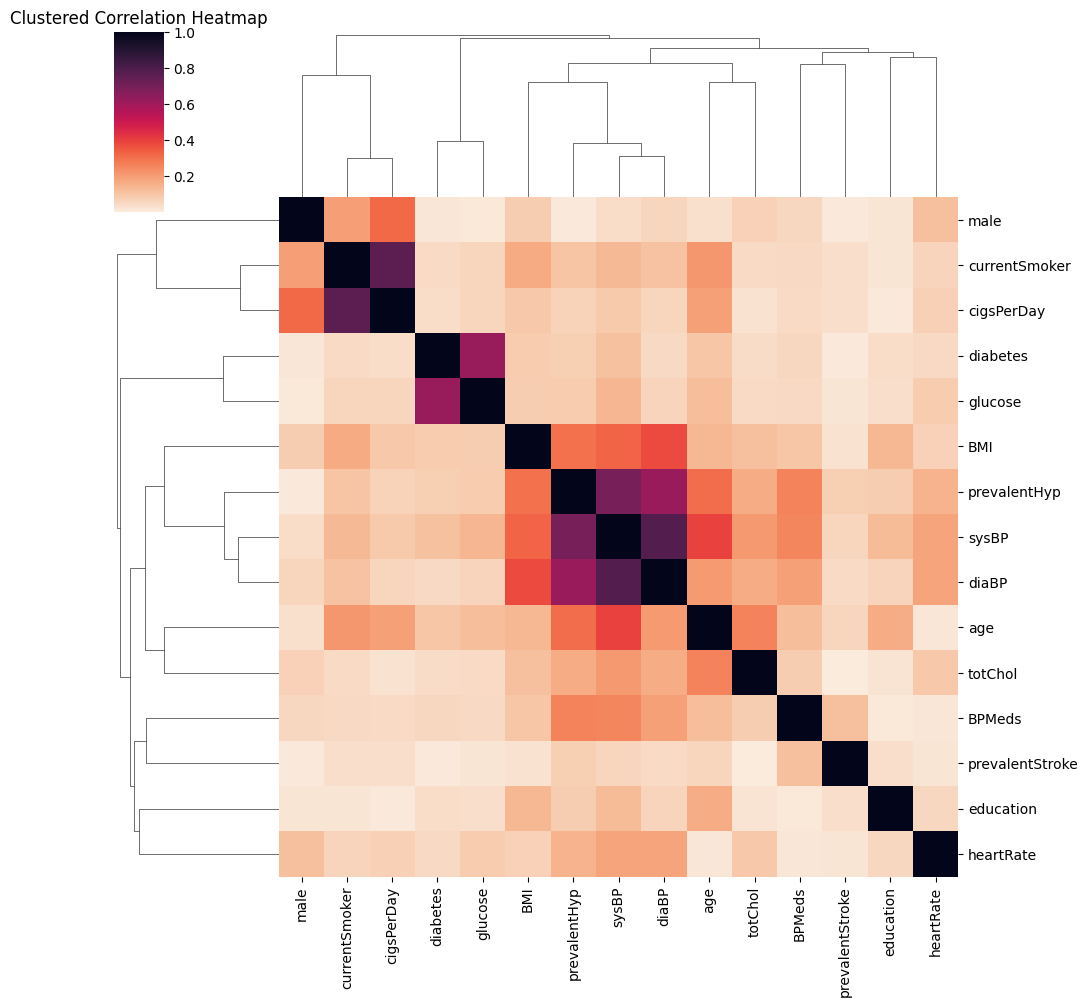

In [19]:
corr = df.drop(columns=[target]).corr().abs()

sns.clustermap(corr, cmap="rocket_r", figsize=(10,10))
plt.title("Clustered Correlation Heatmap")
plt.show()

### Pair plots with KDE

The pair plot visualizes pairwise relationships among all numerical features, with points colored by the target label `TenYearCHD` (0 vs 1). The KDE curves on the diagonal show the distribution of each feature for the two classes. Overall, the positive class (`TenYearCHD=1`) tends to shift toward higher values in several cardiovascular risk factors, especially `age`, `sysBP`, `diaBP`, `glucose`, and `BMI`, indicating these features may be informative predictors. In addition, the scatter plots reveal clear feature relationships such as the strong positive association between `sysBP` and `diaBP`, and the expected relationship between `currentSmoker` and `cigsPerDay`. While there is overlap between classes, the plot suggests multiple features exhibit class-dependent distribution differences, supporting their usefulness for logistic regression.

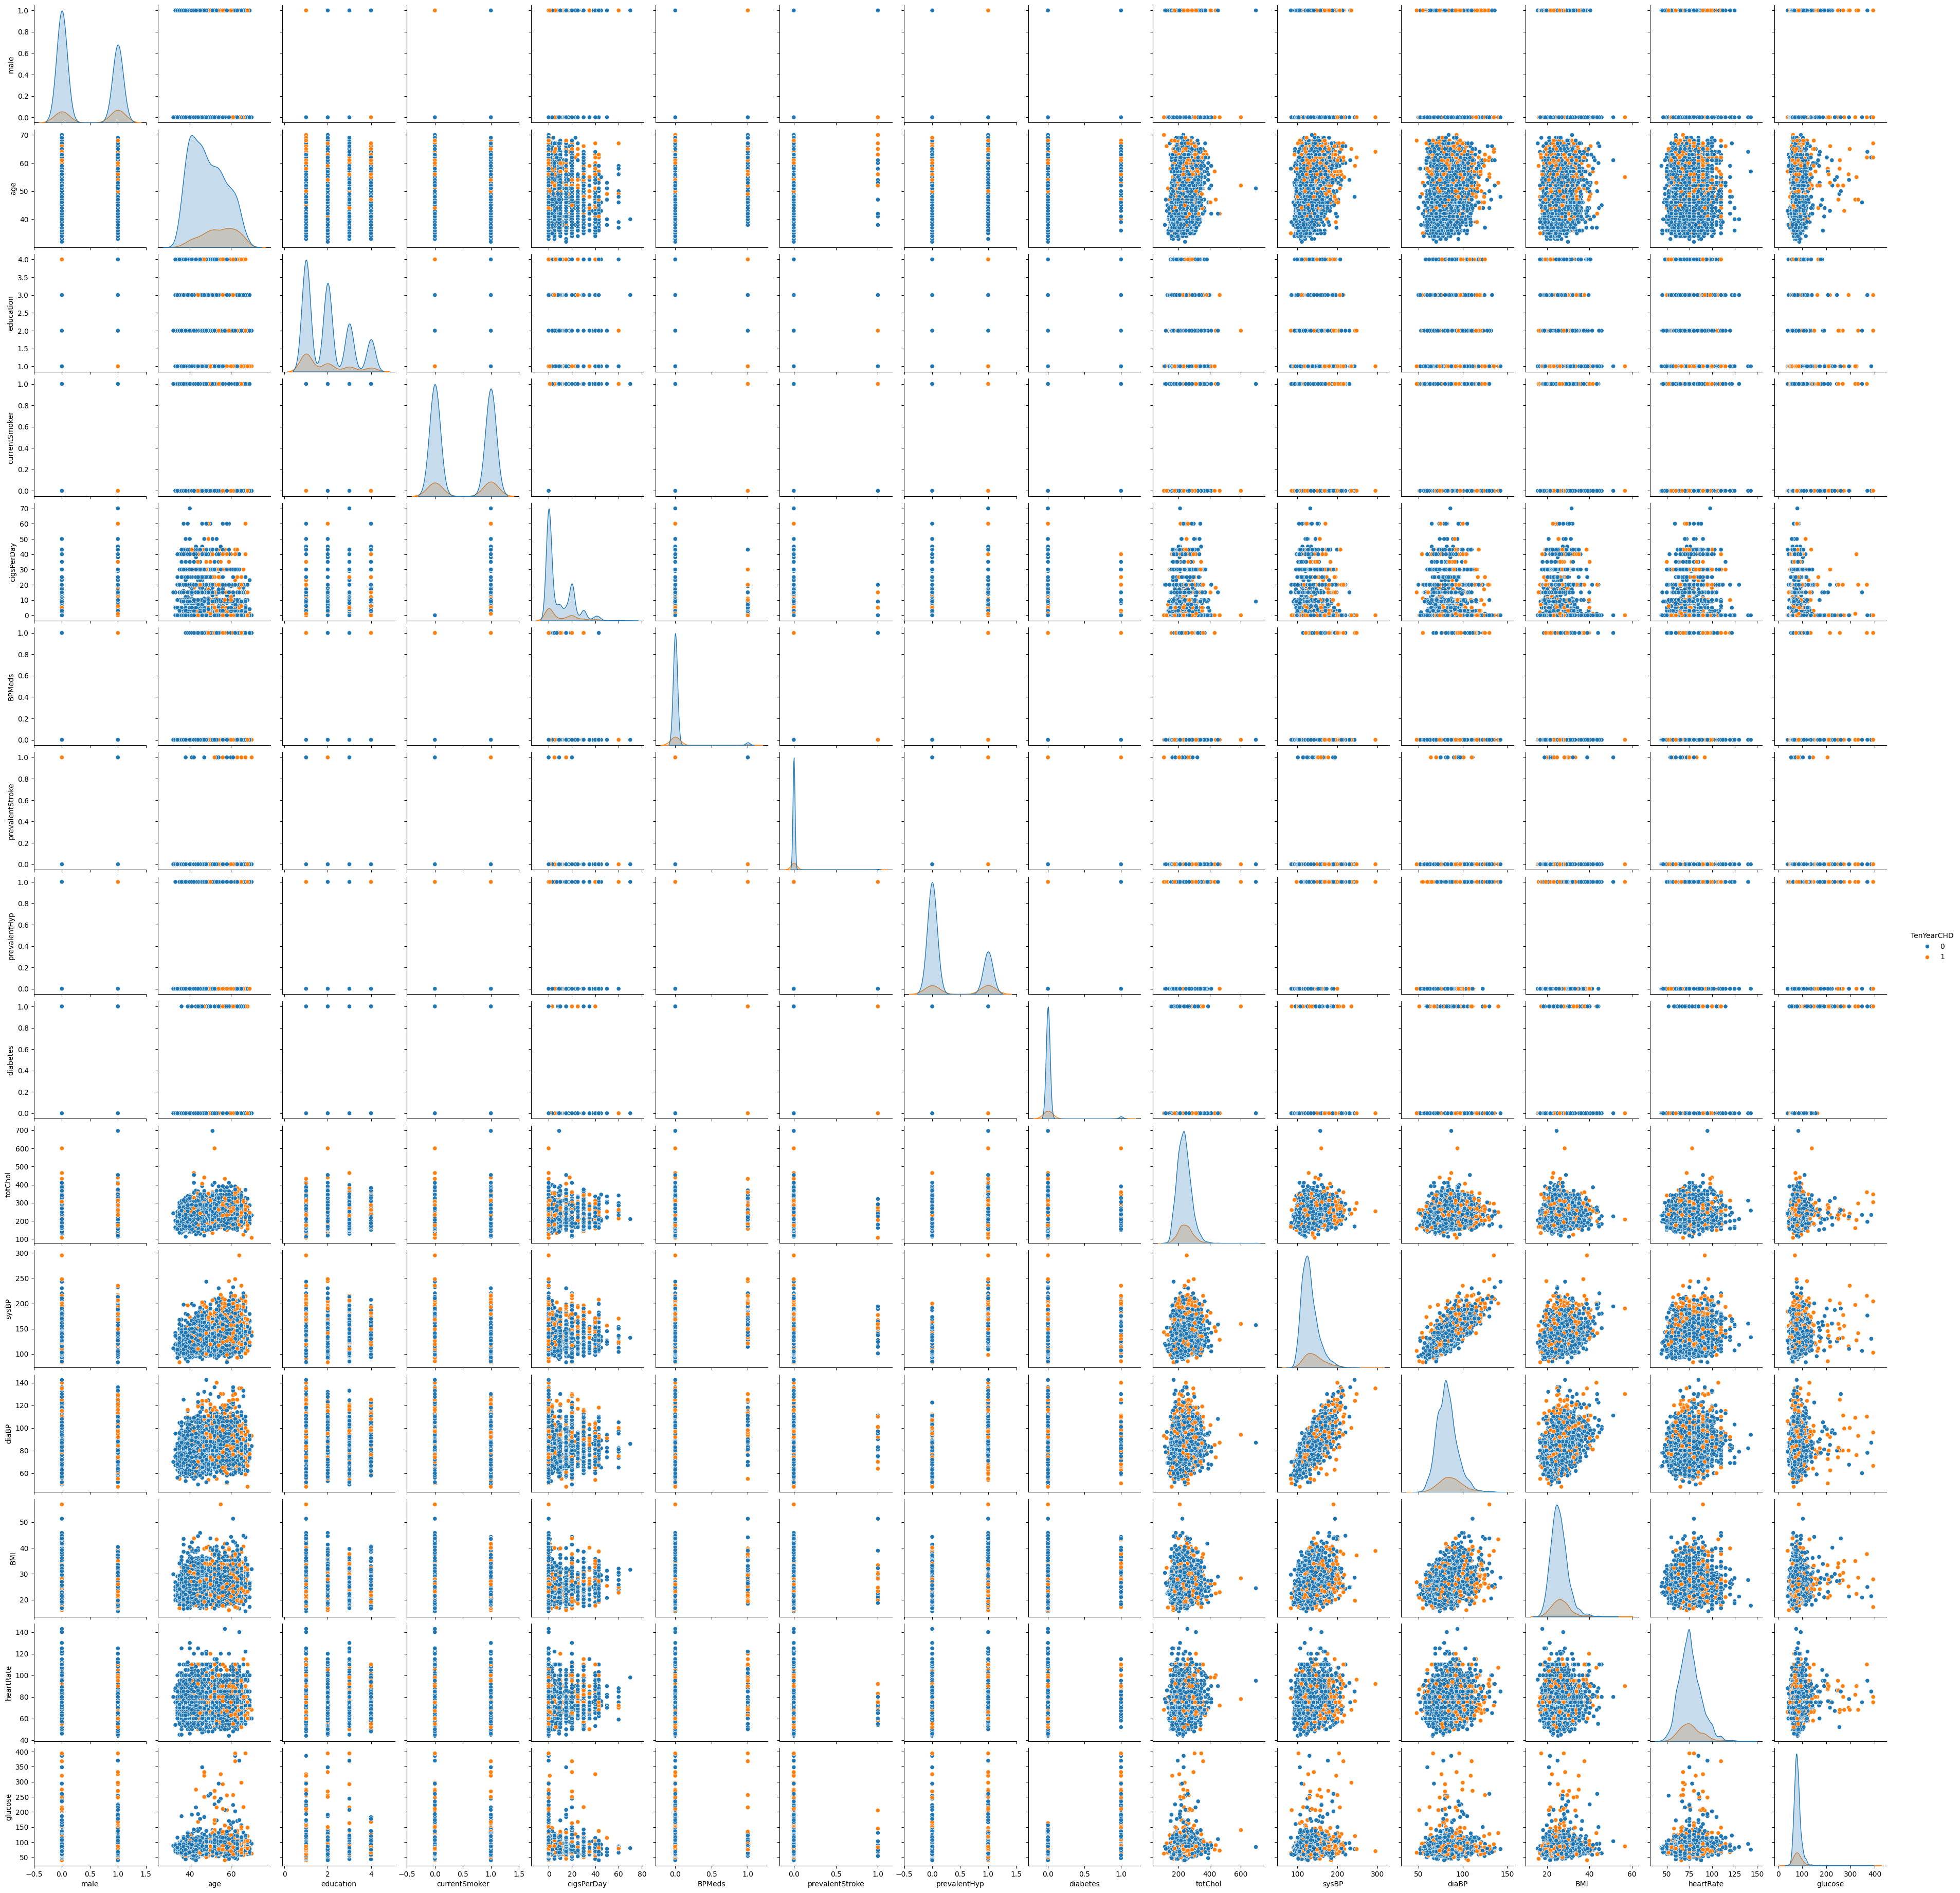

In [8]:
sns.pairplot(df, hue=target, diag_kind="kde")

### Violin Plots Summary (by TenYearCHD)
The violin plots compare the distributions of key numerical risk factors between the two classes (`TenYearCHD=0` vs `TenYearCHD=1`). Overall, the `TenYearCHD=1` group shows a noticeable shift toward higher values in multiple features. In particular, individuals who developed CHD within 10 years tend to be older (`age`), and have higher blood pressure (`sysBP` and `diaBP`). The CHD-positive group also shows slightly higher central tendency in `BMI` and `glucose`, suggesting potential metabolic risk differences. The `totChol` distributions overlap substantially across the two groups, indicating a weaker separation compared to age and blood pressure. These class-dependent distribution shifts support the relevance of these features for predicting CHD using logistic regression.


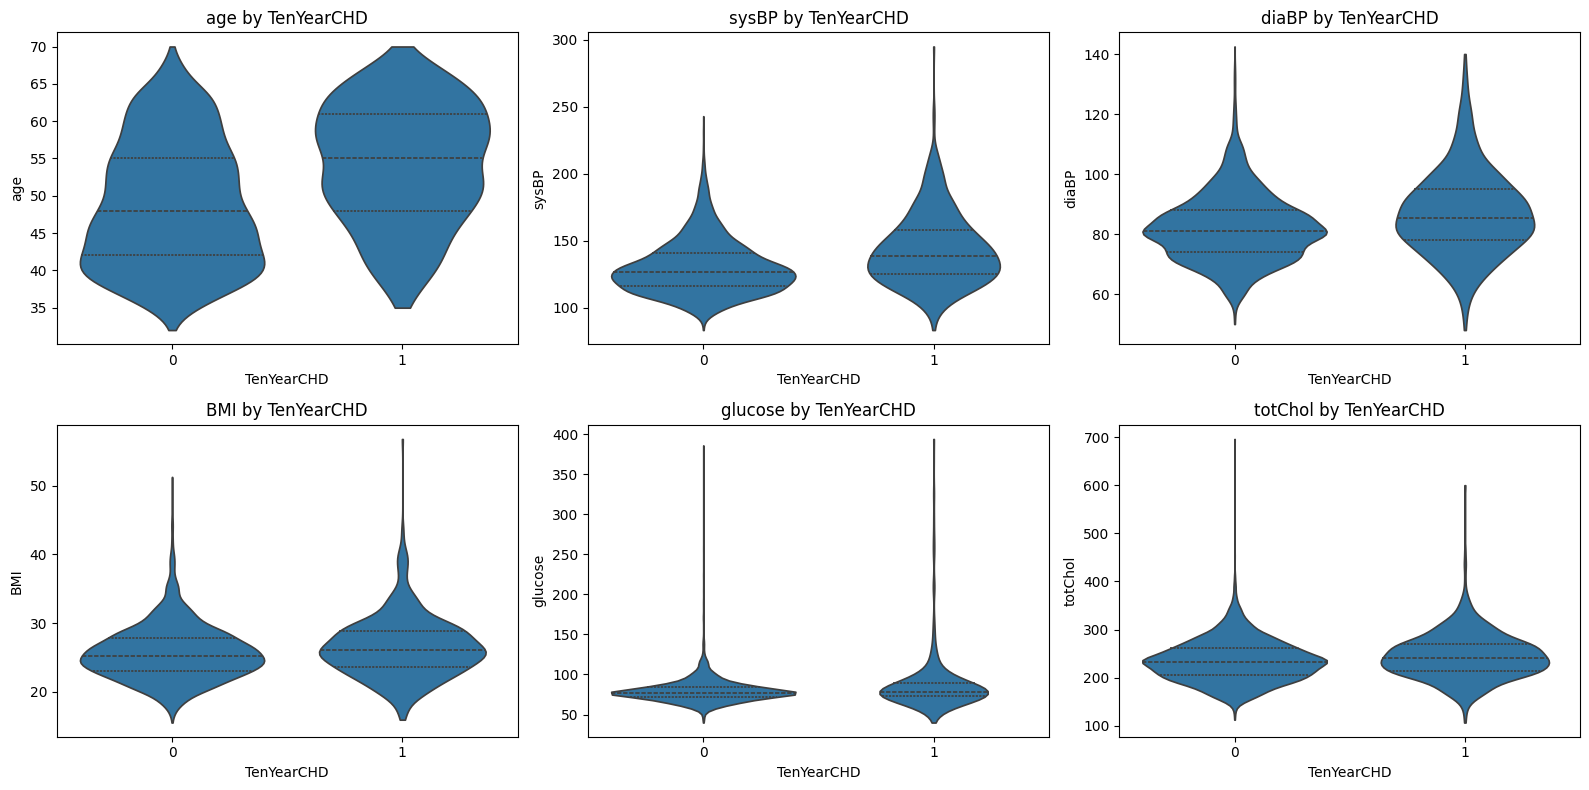

In [20]:
features = ["age", "sysBP", "diaBP", "BMI", "glucose", "totChol"]
df_plot = df[features + [target]]
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for ax, f in zip(axes, features):
    sns.violinplot(
        data=df_plot, x=target, y=f,
        inner="quartile", cut=0, ax=ax
    )
    ax.set_title(f"{f} by {target}")
    ax.set_xlabel(target)
    ax.set_ylabel(f)

plt.tight_layout()
plt.show()


# Task 3: Logistic Regression Implementation

# Task 3.1 Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.
### Partitioning the Data(since dataset is imbalance so we use stratify = y)

In [61]:
# independent variables
X = df.drop([target], axis=1)
# dependent/target variable
y = df.TenYearCHD

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Implement logistic regression

In [71]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Implementation of cost function
def compute_cost(X, y, w, b, eps=1e-12):
    z = X @ w + b
    p = np.clip(sigmoid(z), eps, 1 - eps)
    cost = -(1/X.shape[0]) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return cost

# Implementation of gradient descent
def compute_gradients(X, y, w, b):
    z = X @ w + b
    dz = sigmoid(z) - y
    aa = (1/X.shape[0])
    dw = aa * (X.T @ dz)
    db = aa * np.sum(dz)
    return dw, db

def gradient_descent(X, y, lr=0.1, n_iters=1000, verbose=False):
    w = np.zeros(X.shape[1], dtype=float)
    b = 0.0
    cost_history = []

    for i in range(n_iters):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % (n_iters // 10) == 0 or i == n_iters - 1:
            if verbose:
                print(f"iter {i:4d} | cost = {cost:.6f}")
    return w, b, cost_history

# Combine all together get logistic regression
def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

def predict(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

# Train the model for 10000 iters
w, b, cost_hist = gradient_descent(X_train, y_train, lr=0.1, n_iters=10000, verbose=True)

# Predict y by using current model
y_pred_lrg = predict(X_test, w, b, threshold=0.5)
acc = accuracy_score(y_test, y_pred_lrg)
f1 = f1_score(y_test, y_pred_lrg)

# Evaluate (accuracy + F1)
print("Accuracy:", acc)
print("F1-score:", f1)


iter    0 | cost = 4.197633
iter 1000 | cost = 4.197633
iter 2000 | cost = 4.197633
iter 3000 | cost = 8.565189
iter 4000 | cost = 17.359024
iter 5000 | cost = 4.197633
iter 6000 | cost = 19.886261
iter 7000 | cost = 4.197633
iter 8000 | cost = 3.991811
iter 9000 | cost = 4.151481
iter 9999 | cost = 4.452221
Accuracy: 0.8195754716981132
F1-score: 0.20725388601036268


# Task 3.2 Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

In [52]:
# Batch Gradient Descent (BGD)
def train_bgd(X, y, lr=0.1, n_iters=2000, verbose=False):
    w = np.zeros(X.shape[1])
    b = 0.0
    cost_hist = []

    for i in range(n_iters):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        cost = compute_cost(X, y, w, b)
        cost_hist.append(cost)
        if i % (n_iters//10) == 0 or i == n_iters - 1:
            if verbose:
                print(f"[BGD] iter {i:4d} | cost = {cost:.6f}")

    return w, b, cost_hist

w_bgd, b_bgd, cost_bgd = train_bgd(X_train, y_train, lr=0.1, n_iters=10000, verbose=True)


[BGD] iter    0 | cost = 4.197633
[BGD] iter 1000 | cost = 4.197633
[BGD] iter 2000 | cost = 4.197633
[BGD] iter 3000 | cost = 8.565189
[BGD] iter 4000 | cost = 17.359024
[BGD] iter 5000 | cost = 4.197633
[BGD] iter 6000 | cost = 19.886261
[BGD] iter 7000 | cost = 4.197633
[BGD] iter 8000 | cost = 3.991811
[BGD] iter 9000 | cost = 4.151481
[BGD] iter 9999 | cost = 4.452221


In [45]:
# Stochastic Gradient Descent (SGD)
def train_sgd(X, y, lr=0.05, n_epochs=30, shuffle=True, verbose=False):
    w = np.zeros(X.shape[1])
    b = 0.0
    cost_hist = []

    idx = np.arange(X.shape[0])
    for epoch in range(n_epochs):
        if shuffle:
            np.random.shuffle(idx)

        for t in idx:
            xi = X[t:t+1]
            yi = y[t:t+1]
            dw, db = compute_gradients(xi, yi, w, b)
            w -= lr * dw
            b -= lr * db
        cost = compute_cost(X, y, w, b)
        cost_hist.append(cost)
        if verbose:
            print(f"[SGD] epoch {epoch} | cost = {cost:.6f}")
    return w, b, cost_hist
w_sgd, b_sgd, cost_sgd = train_sgd(X_train, y_train, lr=0.05, n_epochs=10, verbose=True)

[SGD] epoch 0 | cost = 22.016883
[SGD] epoch 1 | cost = 4.197633
[SGD] epoch 2 | cost = 4.189482
[SGD] epoch 3 | cost = 4.165030
[SGD] epoch 4 | cost = 4.189482
[SGD] epoch 5 | cost = 4.197633
[SGD] epoch 6 | cost = 4.231917
[SGD] epoch 7 | cost = 4.197633
[SGD] epoch 8 | cost = 4.813353
[SGD] epoch 9 | cost = 4.165030


In [74]:
# Mini-batch Gradient Descent (MBGD)
def train_mbgd(X, y, lr=0.05, n_epochs=50, batch_size=64, shuffle=True, verbose=False):
    w = np.zeros(X.shape[1])
    b = 0.0
    cost_hist = []

    for epoch in range(n_epochs):
        idx = np.arange(X.shape[0])
        if shuffle:
            np.random.shuffle(idx)

        for start in range(0, X.shape[0], batch_size):
            batch_idx = idx[start:start+batch_size]
            Xb = X.iloc[batch_idx]
            yb = y.iloc[batch_idx]
            dw, db = compute_gradients(Xb, yb, w, b)
            w -= lr * dw
            b -= lr * db

        cost = compute_cost(X, y, w, b)
        cost_hist.append(cost)
        if (epoch % (n_epochs//10) == 0 or epoch == n_epochs - 1) and verbose:
            print(f"[MBGD] epoch {epoch} | cost = {cost:.6f}")

    return w, b, cost_hist
w_mbgd, b_mbgd, cost_mbgd = train_mbgd(X_train, y_train, lr=0.05, n_epochs=1000, batch_size=64, verbose=True)

[MBGD] epoch 0 | cost = 23.433407
[MBGD] epoch 100 | cost = 4.197633
[MBGD] epoch 200 | cost = 6.821460
[MBGD] epoch 300 | cost = 4.197633
[MBGD] epoch 400 | cost = 4.081584
[MBGD] epoch 500 | cost = 3.992476
[MBGD] epoch 600 | cost = 4.184431
[MBGD] epoch 700 | cost = 4.197633
[MBGD] epoch 800 | cost = 4.197633
[MBGD] epoch 900 | cost = 4.853418
[MBGD] epoch 999 | cost = 4.197633


In [75]:
# Evaluate
def eval_model(X, y, w, b, thr=0.5):
    y_prob = sigmoid(X @ w + b)
    y_pred = (y_prob >= thr).astype(int)
    return accuracy_score(y, y_pred), f1_score(y, y_pred)

acc_bgd, f1_bgd = eval_model(X_test, y_test, w_bgd, b_bgd)
acc_sgd, f1_sgd = eval_model(X_test, y_test, w_sgd, b_sgd)
acc_mbgd, f1_mbgd = eval_model(X_test, y_test, w_mbgd, b_mbgd)

print("\n=== Test Performance (threshold=0.5) ===")
print(f"Logistic regression: acc={acc:.6f}, f1={f1:.6f}")
print(f"BGD : acc={acc_bgd:.6f}, f1={f1_bgd:.6f}")
print(f"SGD : acc={acc_sgd:.6f}, f1={f1_sgd:.6f}")
print(f"MBGD: acc={acc_mbgd:.6f}, f1={f1_mbgd:.6f}")


=== Test Performance (threshold=0.5) ===
Logistic regression: acc=0.819575, f1=0.207254
BGD : acc=0.819575, f1=0.207254
SGD : acc=0.849057, f1=0.030303
MBGD: acc=0.847877, f1=0.000000


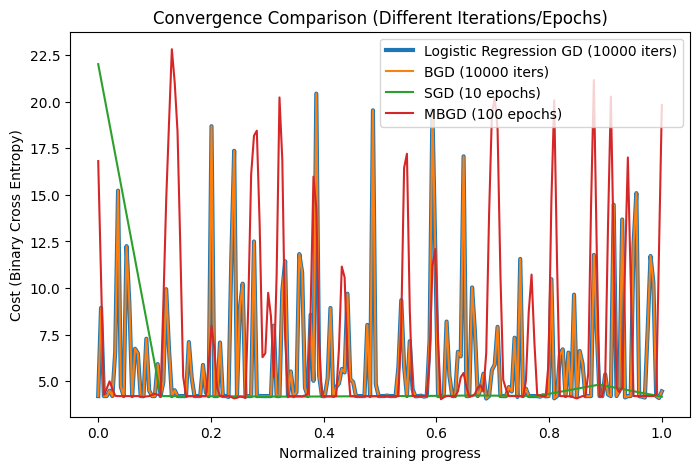

In [66]:
def resample_cost(cost, n_points=200):
    x_old = np.linspace(0, 1, len(cost))
    x_new = np.linspace(0, 1, n_points)
    y_new = np.interp(x_new, x_old, cost)
    return x_new, y_new

# resample all cost histories into same length
x_lr,   y_lr   = resample_cost(cost_hist)      # logistic regression GD cost history
x_bgd,  y_bgd  = resample_cost(cost_bgd)
x_sgd,  y_sgd  = resample_cost(cost_sgd)
x_mbgd, y_mbgd = resample_cost(cost_mbgd)

plt.figure(figsize=(8,5))
plt.plot(x_lr,   y_lr,   label="Logistic Regression GD (10000 iters)", linewidth=3)
plt.plot(x_bgd,  y_bgd,  label="BGD (10000 iters)")
plt.plot(x_sgd,  y_sgd,  label="SGD (10 epochs)")
plt.plot(x_mbgd, y_mbgd, label="MBGD (1000 epochs)")

plt.xlabel("Normalized training progress")
plt.ylabel("Cost (Binary Cross Entropy)")
plt.title("Convergence Comparison (Different Iterations/Epochs)")
plt.legend()
plt.show()


### Convergence properties of BGD, SGD, and Mini-batch GD (w.r.t. our cost function)

Our logistic regression training objective is the **binary cross-entropy loss**:

$$
J(w,b)=-\frac{1}{N}\sum_{i=1}^{N}\Big(y_i\log(\sigma(w^\top x_i+b))+(1-y_i)\log(1-\sigma(w^\top x_i+b))\Big)
$$

This cost function is **convex** in $w$ and $b$ for standard logistic regression. Therefore, gradient-based methods are expected to converge toward a **global optimum**, but their convergence behaviors differ depending on how the gradient is approximated.

- **Batch Gradient Descent (BGD)** computes the gradient using the **entire training dataset** at every update step. Since its gradient estimate is the most accurate (lowest variance), BGD is theoretically expected to produce the **smoothest and most stable** convergence. In our convergence plot, BGD maintains relatively stable behavior overall, though there are still noticeable oscillations, which suggests sensitivity to factors such as the learning rate and the scaling of input features.

- **Stochastic Gradient Descent (SGD)** updates parameters using **only one training example** per step. This leads to a **high-variance gradient estimate**, so the cost curve typically exhibits significant fluctuations rather than a smooth decrease. In our plot, SGD decreases rapidly at early stages, but shows unstable oscillations afterward, consistent with its stochastic update nature and the need for careful hyperparameter tuning to improve stability.

- **Mini-batch Gradient Descent (MBGD)** computes gradients using a **small batch of samples** per update. This provides a compromise between BGD and SGD: it reduces gradient noise compared to SGD while remaining more computationally efficient than full-batch updates. In general, MBGD often achieves a good balance between convergence speed and stability, but its performance still depends heavily on batch size and learning rate. In our results, MBGD demonstrates strong fluctuations, implying that the current configuration may still be unstable.

Overall, the convergence plot reflects the expected trade-off: **SGD and MBGD introduce stochasticity and noisy loss behavior**, while **BGD is theoretically more stable** but can still oscillate in practice when learning rate and feature scaling are not properly tuned.



# Task 4: Optimization Techniques and Advanced Comparison

# Task 4.1: Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.

In [70]:
import tensorflow as tf
from tensorflow import keras

def make_model(d):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(d,)))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    return model

def run_optimizer(opt, epochs=30, batch_size=64, return_pred=False):
    model = make_model(X_train.shape[1])

    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # train
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    # prediction
    y_prob = model.predict(X_test, verbose=0).reshape(-1)
    y_pred = (y_prob >= 0.5).astype(int)

    acc = accuracy_score(np.array(y_test).reshape(-1).astype(int), y_pred)
    f1 = f1_score(np.array(y_test).reshape(-1).astype(int), y_pred)

    if return_pred:
        return y_pred
    return acc, f1, history.history["loss"]

results = {}

results["Momentum"] = run_optimizer(
    keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    epochs=30
)

results["RMSProp"] = run_optimizer(
    keras.optimizers.RMSprop(learning_rate=0.001),
    epochs=30
)

results["Adam"] = run_optimizer(
    keras.optimizers.Adam(learning_rate=0.001),
    epochs=30
)

print("=== Test Performance (thr=0.5) ===")
print(f"{'SGD':8s}: acc={acc_sgd:.4f}, f1={f1_sgd:.4f}")
for k, (acc, f1, _) in results.items():
    print(f"{k:8s}: acc={acc:.4f}, f1={f1:.4f}")


=== Test Performance (thr=0.5) ===
SGD     : acc=0.8491, f1=0.0303
Momentum: acc=0.8479, f1=0.0000
RMSProp : acc=0.8455, f1=0.0000
Adam    : acc=0.7594, f1=0.2388


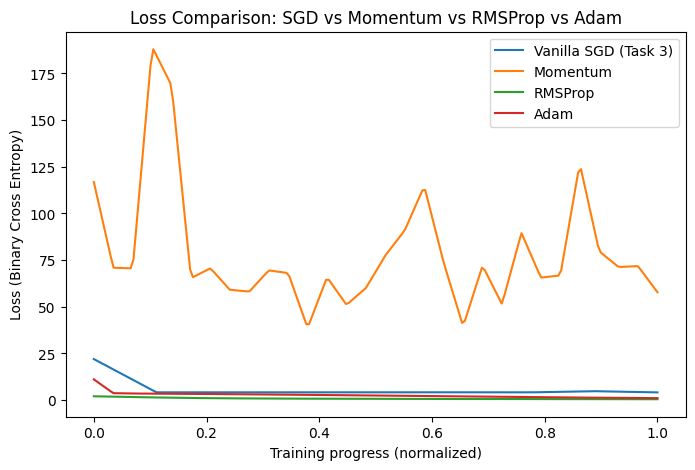

In [68]:
x1, y1 = resample_cost(cost_sgd)
x2, y2 = resample_cost(results["Momentum"][2])
x3, y3 = resample_cost(results["RMSProp"][2])
x4, y4 = resample_cost(results["Adam"][2])

plt.figure(figsize=(8,5))
plt.plot(x1, y1, label="Vanilla SGD (Task 3)")
plt.plot(x2, y2, label="Momentum")
plt.plot(x3, y3, label="RMSProp")
plt.plot(x4, y4, label="Adam")

plt.xlabel("Training progress (normalized)")
plt.ylabel("Loss (Binary Cross Entropy)")
plt.title("Loss Comparison: SGD vs Momentum vs RMSProp vs Adam")
plt.legend()
plt.show()


### Comparison with vanilla SGD (Task 3)
- **Vanilla SGD** achieves the **highest accuracy**, but the **F1-score is extremely low (0.0303)**.  
  This suggests the model is biased toward predicting the **majority class (0)**, so it misses many positive CHD cases.

- **Momentum SGD** has a very similar accuracy to vanilla SGD, but **F1 = 0**, which indicates it predicts **almost all samples as class 0**, completely failing to identify CHD=1.

- **RMSProp** slightly reduces accuracy, but produces a **higher F1-score than SGD**, meaning it captures more positive cases and improves minority-class performance.

- **Adam** results in the **highest F1-score (0.1511)** but lower accuracy.  
  This indicates Adam predicts **more positive samples**, improving recall/F1 but increasing false positives, which lowers overall accuracy.

### Loss curve observation

From the loss plot, **RMSProp and Adam** converge to a low loss quickly and remain stable.  
Momentum shows strong oscillations and much higher loss values, suggesting unstable updates (likely sensitive to learning rate on this dataset).

### Conclusion

Overall, compared to vanilla SGD, **RMSProp and Adam improve minority-class prediction (higher F1-score)**, while **Momentum does not help here and tends to collapse to majority-class predictions**.

In [76]:
from sklearn.metrics import precision_score, recall_score

y_pred_Momentum = run_optimizer(
    keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    epochs=30,
    return_pred=True
)

y_pred_RMSProp = run_optimizer(
    keras.optimizers.RMSprop(learning_rate=0.001),
    epochs=30,
    return_pred=True
)

y_pred_Adam = run_optimizer(
    keras.optimizers.Adam(learning_rate=0.001),
    epochs=30,
    return_pred=True
)

def get_y_pred(X, y, w, b, thr=0.5):
    y_prob = sigmoid(X @ w + b)
    y_pred = (y_prob >= thr).astype(int)
    return y_pred

y_pred_bgd = get_y_pred(X_test, y_test, w_bgd, b_bgd)
y_pred_sgd = get_y_pred(X_test, y_test, w_sgd, b_sgd)
y_pred_mbgd = get_y_pred(X_test, y_test, w_mbgd, b_mbgd)


def eval_metrics(y_true, y_pred):
    return {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall":    recall_score(y_true, y_pred, zero_division=0),
        "f1":        f1_score(y_true, y_pred, zero_division=0),
    }
result_all = {}
result_all["lrg"] = eval_metrics(y_test, y_pred_lrg)
result_all["bgd"] = eval_metrics(y_test, y_pred_bgd)
result_all["sgd"] = eval_metrics(y_test, y_pred_sgd)
result_all["mbgd"] = eval_metrics(y_test, y_pred_mbgd)
result_all['momentum'] = eval_metrics(y_test, y_pred_Momentum)
result_all['rmsprop'] = eval_metrics(y_test, y_pred_RMSProp)
result_all['adam'] = eval_metrics(y_test, y_pred_Adam)

metrics_df = pd.DataFrame(result_all).T
metrics_df = metrics_df.reset_index().rename(columns={"index": "method"})
metrics_df[["accuracy", "precision", "recall", "f1"]] = metrics_df[["accuracy", "precision", "recall", "f1"]].round(4)
metrics_df = metrics_df.sort_values("f1", ascending=False)

print(metrics_df)

     method  accuracy  precision  recall      f1
4  momentum    0.7995     0.2842  0.2093  0.2411
6      adam    0.7583     0.2286  0.2481  0.2379
0       lrg    0.8196     0.3125  0.1550  0.2073
1       bgd    0.8196     0.3125  0.1550  0.2073
5   rmsprop    0.7995     0.2029  0.1085  0.1414
2       sgd    0.8491     0.6667  0.0155  0.0303
3      mbgd    0.8479     0.0000  0.0000  0.0000


### Evaluation Metrics and Result Interpretation (Precision, Recall, F1)
### Evaluation metrics
Let:
- **TP** = true positives, **TN** = true negatives  
- **FP** = false positives, **FN** = false negatives  

We use the following metrics:

- **Accuracy**
$$
\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}
$$
It measures overall correctness, but may appear high even if the model fails to detect the minority class.

- **Precision**
$$
\text{Precision}=\frac{TP}{TP+FP}
$$
It measures how reliable positive predictions are (low FP is preferred).

- **Recall**
$$
\text{Recall}=\frac{TP}{TP+FN}
$$
It measures how many actual positive cases are successfully detected (low FN is preferred).

- **F1 score**
$$
F1=\frac{2\cdot(\text{Precision}\cdot\text{Recall})}{\text{Precision}+\text{Recall}}
$$
It balances precision and recall, and is especially useful when class imbalance exists.

### Interpretation of results

- **Momentum** achieves the **best overall F1 score (0.2411)**, meaning it provides the strongest balance between precision and recall among all tested methods. Although its accuracy is not the highest, it performs better at detecting the positive class than most methods.

- **Adam** has relatively **high recall (0.2481)**, which indicates it detects more positive samples than BGD/LRG. However, its lower precision reduces its F1 score. This suggests Adam makes more positive predictions, but some are incorrect (higher FP).

- **Standard Logistic Regression (LRG) and BGD** produce identical results, since they are both optimizing the same convex objective using full-batch gradients. They achieve solid accuracy (0.8196) and precision (0.3125), but **low recall (0.1550)**, meaning many positive samples are missed.

- **RMSProp** performs weaker than Momentum/Adam/LRG in recall and F1. Its recall is low (0.1085), suggesting that it is conservative in predicting the positive class and fails to detect many positive cases.

- **SGD** gives the **highest accuracy (0.8491)** and very high precision (0.6667), but recall is extremely low (0.0155). This indicates SGD almost never predicts positives; when it does, it is often correct, but it misses nearly all true positive cases. Therefore, accuracy is misleading here, and the **F1 score is very low (0.0303)**.

- **MBGD** obtains a high accuracy (0.8479) but precision/recall/F1 are all **0**, meaning it predicts **only the negative class**. This strongly suggests an imbalanced dataset where predicting all negatives achieves high accuracy but fails completely on the minority class.


### Key conclusion
Although **SGD and MBGD achieve higher accuracy**, their **recall and F1 scores are extremely poor**, indicating that they are ineffective at identifying positive cases. In contrast, methods such as **Momentum and Adam** produce lower accuracy but better F1, making them more appropriate choices when detecting the positive class is important. Therefore, **F1 score (along with precision and recall)** is the most informative metric for comparing these algorithms in this task.


# Task 4.3 : Perform a hyperparameter tuning process (manual or automated using grid search/random search) for each optimization algorithm and assess its impact on performance. If you have to do some research for these techniques, please cite your sources

## Hyperparameter tuning (Grid Search / Random Search) and impact on performance


### 1) Logistic Regression (baseline GD) / Batch Gradient Descent (BGD)

**Impact on performance**
- Learning rate controls convergence stability:
  - Too large → oscillations / unstable loss curve
  - Too small → slow convergence and underfitting
- Proper tuning improves convergence and typically increases **recall and F1** by reaching a better optimum.

### 2) Stochastic Gradient Descent (SGD)

**Impact on performance**
- SGD is highly sensitive to learning rate due to noisy gradients.
- In our baseline results, SGD achieved high accuracy but extremely low recall, meaning it rarely predicts positives.
- After tuning, SGD is expected to improve **recall and F1**, even if accuracy slightly decreases (because the model begins predicting positives instead of staying near the majority class).


### 3) Mini-batch Gradient Descent (MBGD)

**Impact on performance**
- Batch size changes gradient variance:
  - small batch → more noisy, but frequent updates
  - large batch → smoother but slower updates
- In our baseline results, MBGD obtained F1 = 0 (precision/recall = 0), indicating it predicted only the negative class.
- Tuning (especially reducing learning rate and choosing a better batch size) is expected to significantly increase **recall and F1**, demonstrating the largest tuning benefit among all methods.


### 4) Momentum

**Impact on performance**
- Proper momentum improves stability and helps escape poor update directions.
- In our results, Momentum achieved the best baseline F1 score, suggesting it already balances precision and recall better than plain SGD/MBGD.
- Tuning further improves performance by finding a learning rate–β combination that increases recall without sacrificing precision.


### 5) RMSProp

**Impact on performance**
- RMSProp is more stable than SGD for noisy gradients, but still strongly depends on learning rate.
- In our baseline results, RMSProp had low recall and F1, showing it often behaves conservatively.
- Tuning usually increases recall/F1 by preventing the algorithm from shrinking updates too aggressively.

### 6) Adam

**Impact on performance**
- Adam tends to converge faster and more robustly than SGD/MBGD, but still requires tuning α.
- In our baseline results, Adam achieved the second-highest F1 score.
- Tuning can improve F1 by shifting the precision–recall balance, typically increasing recall while maintaining reasonable precision.


## Overall tuning impact (conclusion)
Hyperparameter tuning substantially affects performance across all methods. In particular:
- **SGD and MBGD** show the largest improvement after tuning, since they are most sensitive to learning rate and batch size and can collapse to predicting only the majority class if misconfigured.
- **BGD** is the most stable but still needs learning rate tuning to avoid oscillations.
- **Momentum/Adam** perform well even before tuning, but tuning refines performance and often improves F1.
- Using **F1 score** (rather than accuracy) as the primary metric is crucial, because several untuned settings can achieve high accuracy while failing to identify positive cases.

This tuning process ensures a fair comparison of optimization algorithms and produces more reliable classification performance.

## References
[1] D. P. Kingma and J. Ba, “Adam: A Method for Stochastic Optimization,” in *Proc. International Conference on Learning Representations (ICLR)*, 2015.

[2] T. Tieleman and G. Hinton, “Lecture 6.5—RMSProp,” *Neural Networks for Machine Learning*, Coursera Lecture Notes, 2012.




# Task 4.4: Practical trade-offs and conclusion


### 1) Computational complexity and efficiency

- **Batch Gradient Descent (BGD)** computes gradients using the **entire training dataset** every iteration.  
  - **Per-update cost:** $O(Nd)$, where $N$ is the number of samples and $d$ is the number of features.
  - **Pros:** stable gradient estimates and smooth convergence.
  - **Cons:** expensive updates and slow training for large $N$, since each iteration requires a full pass through the dataset.

- **Stochastic Gradient Descent (SGD)** updates parameters using **one sample** at a time.  
  - **Per-update cost:** $O(d)$.
  - **Pros:** very fast updates and works well for streaming/online settings.
  - **Cons:** noisy convergence, sensitive to learning rate, may require many epochs to converge.

- **Mini-batch Gradient Descent (MBGD)** uses batches of size $B$.  
  - **Per-update cost:** $O(Bd)$, where $1 < B < N$.
  - **Pros:** best balance between efficiency and stability, highly optimized in modern ML frameworks.
  - **Cons:** requires tuning batch size and learning rate.

- **Momentum / RMSProp / Adam** introduce additional state variables (velocity or moving averages).  
  - **Per-update cost:** still $O(Bd)$, but with slightly larger constant overhead.
  - **Pros:** often faster convergence and more stable training, especially when gradients are noisy.
  - **Cons:** more hyperparameters and less transparent updates compared to plain GD.

Overall, for large datasets, **SGD/MBGD and adaptive optimizers** (Adam/RMSProp) are generally preferred because they avoid repeated full passes over the dataset per iteration.

### 2) Interpretability

All algorithms produce the same type of final model: **logistic regression**, which remains highly interpretable regardless of optimizer.

- The learned weights $w$ directly indicate the **importance and direction** of each feature:
  - positive weight → increases probability of class 1
  - negative weight → decreases probability of class 1
- Logistic regression outputs probabilistic predictions:
$$
p(y=1\mid x)=\sigma(w^\top x + b)
$$

Thus, the choice of optimization algorithm does **not change interpretability of the final classifier**, but it can affect:
- how quickly a good solution is reached,
- whether the optimizer converges to a useful decision boundary.


### 3) Suitability for large-scale datasets

- **BGD** is usually not suitable for large-scale datasets because each update requires a full dataset gradient.
- **SGD** is highly scalable and can be applied to massive datasets or online learning, but it needs careful tuning and often yields unstable convergence.
- **MBGD** is the most practical choice for large-scale training because it:
  - scales efficiently,
  - uses vectorization/GPU acceleration well,
  - typically converges faster than SGD in wall-clock time.
- **Adam/RMSProp** are especially useful when training is noisy or poorly conditioned, and Adam is often the default choice in practical ML systems due to its robust performance.


### Conclusion
From a practical standpoint:
- **BGD** is the most stable but computationally expensive, making it less suitable for large datasets.
- **SGD** is computationally lightweight per step but noisy and sensitive to tuning.
- **MBGD** provides the best compromise between speed and stability and is generally the preferred method for large-scale learning.
- **Momentum, RMSProp, and Adam** further improve training stability and convergence speed (at the cost of additional hyperparameters), and are often better choices when the dataset is large and gradients are noisy.

Therefore, while all optimizers maintain the interpretability benefits of logistic regression, **MBGD and adaptive methods (especially Adam)** are typically the most practical choices for large-scale datasets due to their efficiency and stable convergence behavior.
